## **US Honey Case Study**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv('/content/US_honey_dataset.csv')

In [ ]:
df.head()

Unnamed: 0       state  colonies_number  yield_per_colony  production  \
0           0     Alabama            16000                58      928000   
1           1     Arizona            52000                79     4108000   
2           2    Arkansas            50000                60     3000000   
3           3  California           420000                93    39060000   
4           4    Colorado            45000                60     2700000   

    stocks  average_price  value_of_production  year  
0    28000           62.0               575000  1995  
1   986000           68.0              2793000  1995  
2   900000           64.0              1920000  1995  
3  4687000           60.0             23436000  1995  
4  1404000           68.0              1836000  1995

In [ ]:
df.shape #to see the number of rows and columns

(1115, 9)

In [ ]:
df.info() #to see the information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           1115 non-null   int64  
 1   state                1115 non-null   object 
 2   colonies_number      1115 non-null   int64  
 3   yield_per_colony     1115 non-null   int64  
 4   production           1115 non-null   int64  
 5   stocks               1115 non-null   int64  
 6   average_price        1115 non-null   float64
 7   value_of_production  1115 non-null   int64  
 8   year                 1115 non-null   int64  
dtypes: float64(1), int64(7), object(1)
memory usage: 78.5+ KB


In [ ]:
df.isnull().sum() #to see the number of null

Unnamed: 0             0
state                  0
colonies_number        0
yield_per_colony       0
production             0
stocks                 0
average_price          0
value_of_production    0
year                   0
dtype: int64

In [ ]:
df.duplicated().sum() #to see the number of duplicate values

0

In [ ]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [ ]:
df.head()

state  colonies_number  yield_per_colony  production   stocks  \
0     Alabama            16000                58      928000    28000   
1     Arizona            52000                79     4108000   986000   
2    Arkansas            50000                60     3000000   900000   
3  California           420000                93    39060000  4687000   
4    Colorado            45000                60     2700000  1404000   

   average_price  value_of_production  year  
0           62.0               575000  1995  
1           68.0              2793000  1995  
2           64.0              1920000  1995  
3           60.0             23436000  1995  
4           68.0              1836000  1995

In [ ]:
df.columns

Index(['state', 'colonies_number', 'yield_per_colony', 'production', 'stocks',
       'average_price', 'value_of_production', 'year'],
      dtype='object')

**State wise honey production**

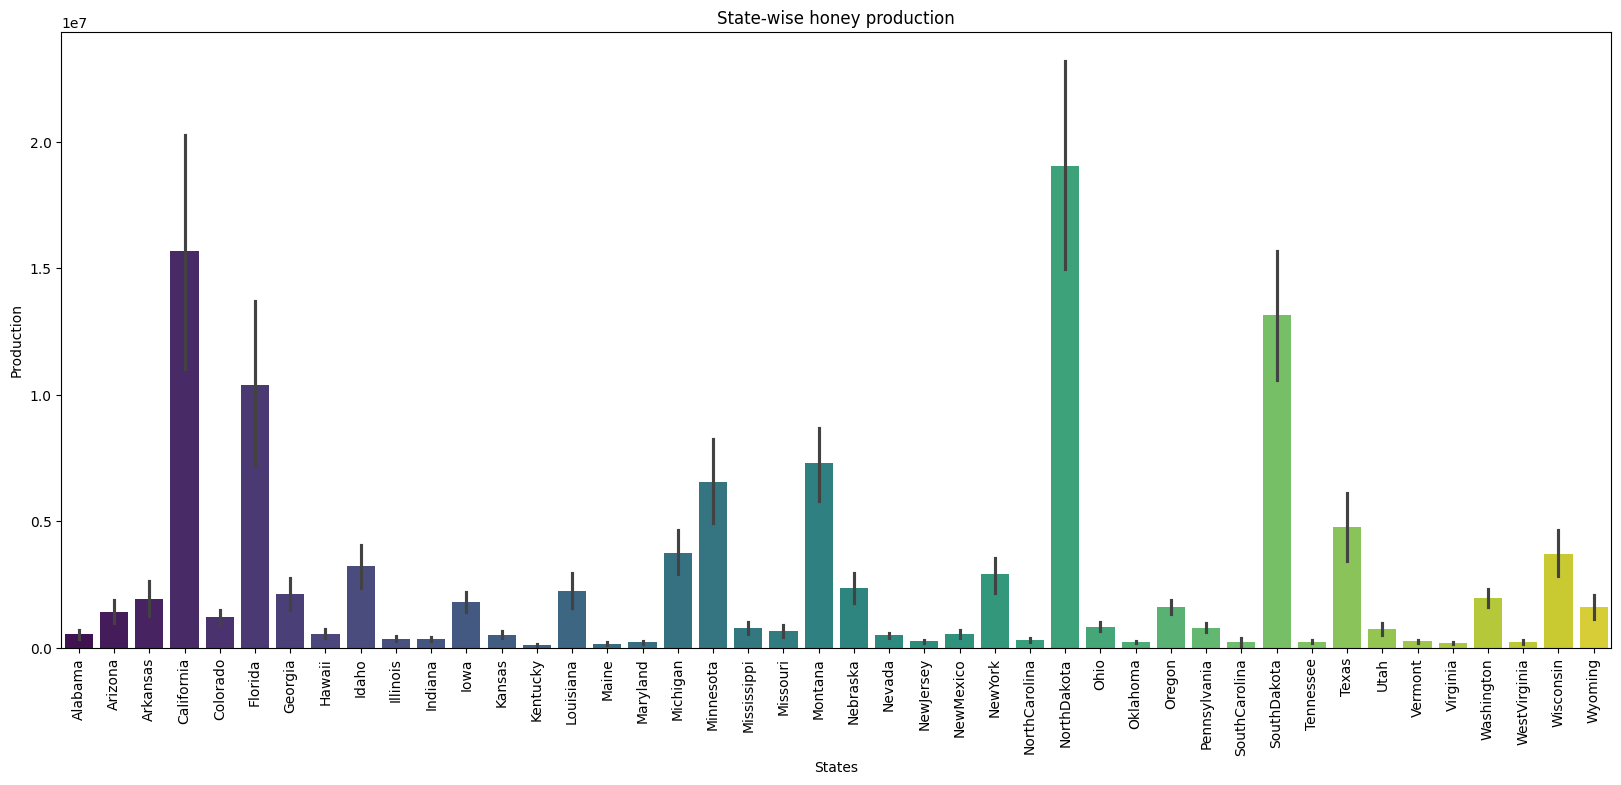

In [ ]:
plt.figure(figsize=(20,8))
sns.barplot(x='state',y='production',data=df,palette='viridis')
plt.title('State-wise honey production')
plt.xlabel('States')
plt.ylabel('Production')
plt.xticks(rotation=90)
plt.show()

**Top and bottom 5 states v/s production,Avg_price**

In [ ]:
states_production=df.groupby('state')['production'].sum().reset_index()

In [ ]:
states_production.head()

state  production
0     Alabama    14467000
1     Arizona    38844000
2    Arkansas    51846000
3  California   423876000
4    Colorado    32660000

In [ ]:
Top_5_states_production=states_production.sort_values(by='production',ascending=False).head()

In [ ]:
Top_5_states_production

state  production
28  NorthDakota   513742000
3    California   423876000
34  SouthDakota   355726000
5       Florida   280934000
21      Montana   197173000

In [ ]:
sns.barplot(x='state',y='production',data=Top_5_states_production,palette='Set2')
plt.title('Top 5 states producing honey')
plt.xlabel('State')
plt.ylabel('Production')
plt.show()

In [ ]:
Bottom_5_states_production=states_production.sort_values(by='production',ascending=True).head()

In [ ]:
Bottom_5_states_production

state  production
16       Maryland     1975000
30       Oklahoma     2055000
33  SouthCarolina     2823000
13       Kentucky     3224000
15          Maine     4762000

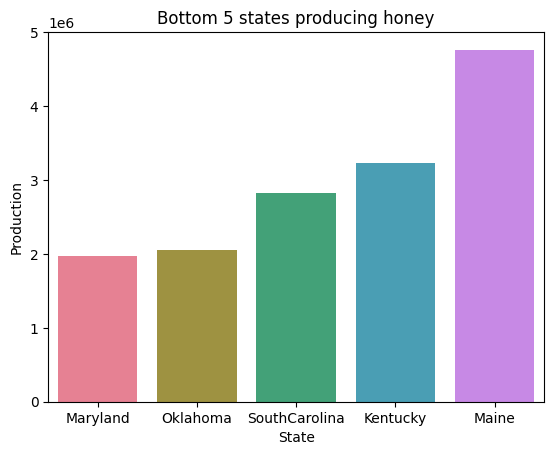

In [ ]:
sns.barplot(x='state',y='production',data=Bottom_5_states_production,palette='husl')
plt.title('Bottom 5 states producing honey')
plt.xlabel('State')
plt.ylabel('Production')
plt.show()

**Class doubt**

In [ ]:
categories=['A','B','C','D']

In [ ]:
values=[23,45,56,78]

In [ ]:
bars=plt.bar(categories,values,color='skyblue')
for bar in bars:
  yval=bar.get_height()
  plt.text(bar.get_x()+bar.get_width()/2,yval,int(yval),ha='center',va='bottom')
plt.show()

**For avg_price**

In [ ]:
states_avg_price=df.groupby('state')['average_price'].sum().reset_index()
states_avg_price.head()

state  average_price
0     Alabama        4057.61
1     Arizona        2978.77
2    Arkansas        2870.45
3  California        2954.06
4    Colorado        3200.56

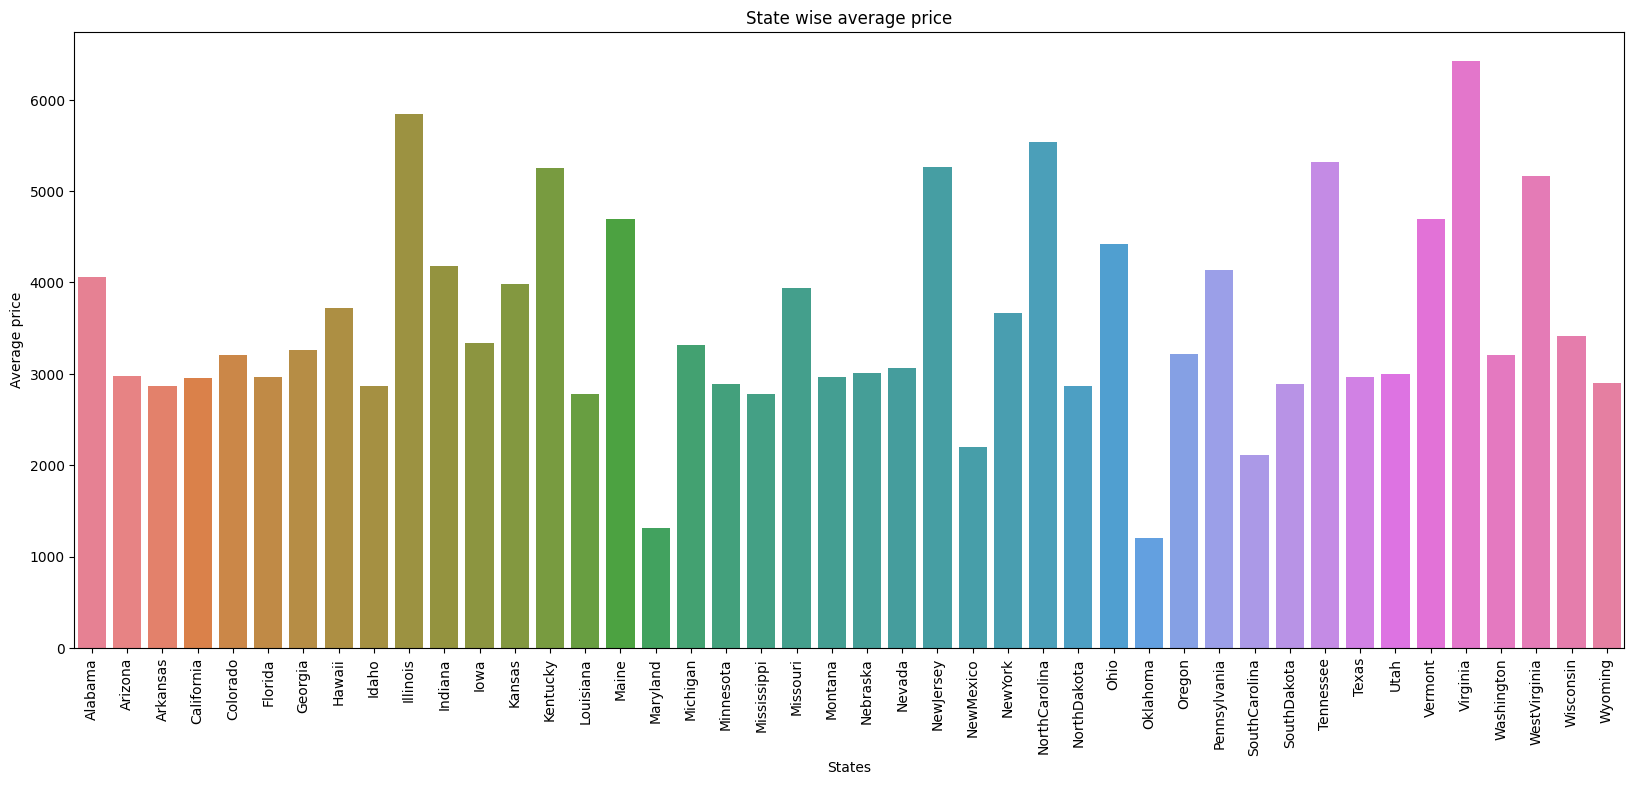

In [ ]:
plt.figure(figsize=(20,8))
sns.barplot(x='state',y='average_price',data=states_avg_price,palette='husl')
plt.title('State wise average price')
plt.xlabel('States')
plt.ylabel('Average price')
plt.xticks(rotation=90)
plt.show()

In [ ]:
Top_5_Avg=states_avg_price.sort_values(by='average_price',ascending=False).head()
Top_5_Avg

state  average_price
39       Virginia        6419.69
9        Illinois        5842.43
27  NorthCarolina        5540.21
35      Tennessee        5318.06
24      NewJersey        5262.74

In [ ]:
# another method to find the same answer
# Top=states_avg_price.nlargest(5,'average_price')

In [ ]:
plt.pie(x='average_price',labels='state',autopct='%1.1f%%',data=Top_5_Avg)
plt.title('Top 5 states in terms of average price')
plt.show()

In [ ]:
#find bottom 5 states average price and plot it

**Year vs Avg_price, production**

In [ ]:
year_avg_price=df.groupby('year')['average_price'].sum().reset_index()

In [ ]:
year_avg_price.head()

year  average_price
0  1995         3293.0
1  1996         4381.0
2  1997         3927.0
3  1998         3600.0
4  1999         3454.0

In [ ]:
df['year'].unique()

array([1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005,
       2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016,
       2017, 2018, 2019, 2020, 2021])

In [ ]:
plt.figure(figsize=(20,8))
sns.set(style='whitegrid')
sns.lineplot(x='year',y='average_price',data=year_avg_price)
plt.title('Average price trend in last 27 years',fontsize=30)
plt.xlabel('Year',fontsize=20)
plt.ylabel('Average price',fontsize=20)
plt.show()

In [ ]:
year_prod=df.groupby('year')['production'].sum().reset_index()

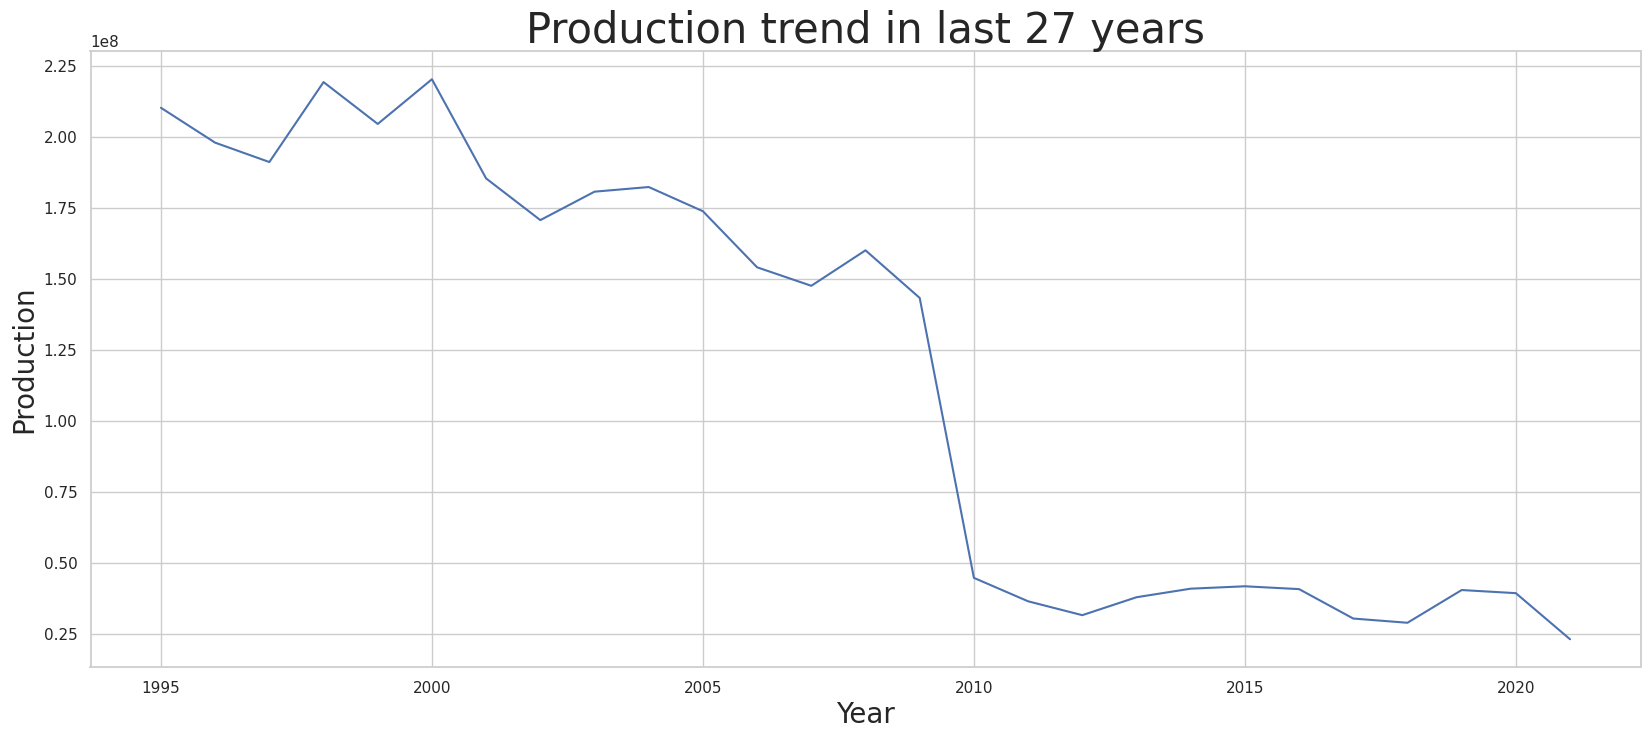

In [ ]:
plt.figure(figsize=(20,8))
sns.set(style='whitegrid')
sns.lineplot(x='year',y='production',data=year_prod)
plt.title('Production trend in last 27 years',fontsize=30)
plt.xlabel('Year',fontsize=20)
plt.ylabel('Production',fontsize=20)
plt.show()

**1) Which states are rarely contributing to honey production for the last 27 years?**

In [ ]:
states_production=df.groupby('state')['production'].sum().reset_index()

In [ ]:
rarely_contr=states_production.sort_values(by='production',ascending=True).head()

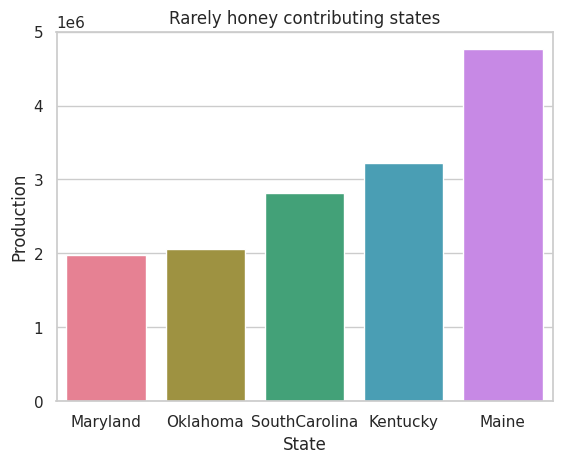

In [ ]:
sns.barplot(x='state',y='production',data=rarely_contr,palette='husl')
plt.title('Rarely honey contributing states')
plt.xlabel('State')
plt.ylabel('Production')
plt.show()

**2) Which are the top 5 Honey producing states in the US ?**

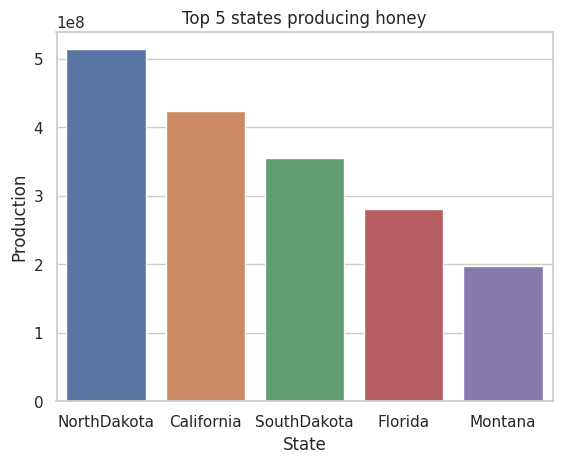

In [ ]:
sns.barplot(x='state',y='production',data=Top_5_states_production,palette='deep')
plt.title('Top 5 states producing honey')
plt.xlabel('State')
plt.ylabel('Production')
plt.show()

**3) What is the Change in mean Average price of Honey from 1995 to 2021?**

In [ ]:
mean_avg=df.groupby('year')['average_price'].mean()

In [ ]:
mean_avg

year
1995     74.840909
1996     99.568182
1997     91.325581
1998     83.720930
1999     80.325581
2000     79.023256
2001     88.465116
2002    133.204545
2003    151.068182
2004    132.350000
2005    116.341463
2006    134.341463
2007    140.170732
2008    160.878049
2009    176.195122
2010    192.900000
2011    216.725000
2012    236.700000
2013    260.717949
2014    282.025000
2015    292.625000
2016    291.925000
2017    302.775000
2018      3.083500
2019      2.925500
2020      3.050000
2021      3.334250
Name: average_price, dtype: float64

In [ ]:
mean_avg.loc[1995]

74.8409090909091

In [ ]:
change_mean=mean_avg.loc[1995]-mean_avg.loc[2021]

In [ ]:
change_mean

71.5066590909091

In [ ]:
74.840909 - 3.334250

71.506659

**4) Which was the year when production of Honey in wholeUS was the highest?**

In [ ]:
highest_prod=df.groupby('year')['production'].sum().reset_index()

In [ ]:
highest_prod.sort_values(by='production',ascending=False).head(1)

year  production
5  2000   220320000

**5) From the above inference we get the production was highest in the year 2000, now let infer which state was having highest contribution in that year?**

In [ ]:
highest_prod_state=df.groupby(['state','year'])['production'].sum().reset_index()
highest_prod_state

state  year  production
0     Alabama  1995      928000
1     Alabama  1996     1024000
2     Alabama  1997      924000
3     Alabama  1998     1136000
4     Alabama  1999     1156000
...       ...   ...         ...
1110  Wyoming  2017      186000
1111  Wyoming  2018      175000
1112  Wyoming  2019      306000
1113  Wyoming  2020      608000
1114  Wyoming  2021      242000

[1115 rows x 3 columns]

In [ ]:
state_2000_year=highest_prod_state.loc[(highest_prod_state['year']==2000)]
state_2000_year.head()

state  year  production
5       Alabama  2000     1248000
32      Arizona  2000     2360000
59     Arkansas  2000     5115000
86   California  2000    30800000
113    Colorado  2000     1740000

In [ ]:
state_2000_year.sort_values(by='production',ascending=False).head(1)

state  year  production
721  NorthDakota  2000    33350000

**6) Which states have the highest no. of colonies in the year 2000?**

In [ ]:
df.columns

Index(['state', 'colonies_number', 'yield_per_colony', 'production', 'stocks',
       'average_price', 'value_of_production', 'year'],
      dtype='object')

In [ ]:
highest_colony=df.groupby(['state','year'])['colonies_number'].sum().reset_index()
highest_colony.head()

state  year  colonies_number
0  Alabama  1995            16000
1  Alabama  1996            16000
2  Alabama  1997            14000
3  Alabama  1998            16000
4  Alabama  1999            17000

In [ ]:
state_2000_colony=highest_colony.loc[(highest_colony['year']==2000)]
state_2000_colony.head()

state  year  colonies_number
5       Alabama  2000            16000
32      Arizona  2000            40000
59     Arkansas  2000            55000
86   California  2000           440000
113    Colorado  2000            29000

In [ ]:
result=state_2000_colony.loc[state_2000_colony['colonies_number'].idxmax()]
result

state              California
year                     2000
colonies_number        440000
Name: 86, dtype: object

In [ ]:
bar=state_2000_colony.sort_values(by='colonies_number',ascending=False).head()
bar

state  year  colonies_number
86    California  2000           440000
721  NorthDakota  2000           290000
850  SouthDakota  2000           235000
140      Florida  2000           232000
472    Minnesota  2000           150000

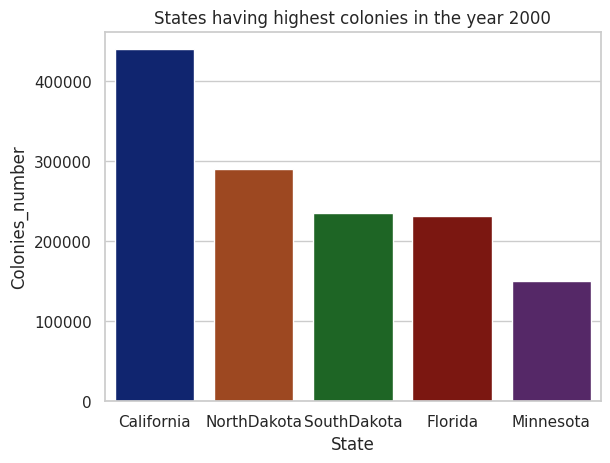

In [ ]:
sns.barplot(x='state',y='colonies_number',data=bar,palette='dark')
plt.title('States having highest colonies in the year 2000')
plt.xlabel('State')
plt.ylabel('Colonies_number')
plt.show()

**class doubt**

In [ ]:
r=df.groupby('state').agg('sum')

In [ ]:
r.head()

colonies_number  yield_per_colony  production     stocks  \
state                                                                  
Alabama              288000              1615    14467000    2987000   
Arizona              854000              1490    38844000   17758000   
Arkansas             908000              1886    51846000   20897000   
California         10135000              1426   423876000  137611000   
Colorado             799000              1520    32660000   18695000   

            average_price  value_of_production   year  
state                                                  
Alabama           4057.61             28668000  54216  
Arizona           2978.77             59772000  54216  
Arkansas          2870.45             73781000  54216  
California        2954.06            653982000  54216  
Colorado          3200.56             63844000  54216

In [ ]:
df.groupby("state").agg({"production":"sum",'average_price':'mean'})

production  average_price
state                                   
Alabama          14467000     150.281852
Arizona          38844000     110.324815
Arkansas         51846000     106.312963
California      423876000     109.409630
Colorado         32660000     118.539259
Florida         280934000     109.908148
Georgia          57426000     120.765926
Hawaii           15420000     137.745556
Idaho            87188000     106.285556
Illinois          9864000     216.386296
Indiana           9686000     154.931852
Iowa             48607000     123.768519
Kansas           14138000     147.312593
Kentucky          3224000     201.940385
Louisiana        60568000     103.074815
Maine             4762000     173.770370
Maryland          1975000     145.555556
Michigan        101063000     122.665556
Minnesota       176581000     106.958889
Mississippi      21235000     102.840741
Missouri         17904000     145.991111
Montana         197173000     109.672963
Nebraska         63655000     111.270741
Nevada            7399000     204.533333
NewJersey         6913000     194.916296
NewMexico        10082000     122.055556
NewYork          78444000     135.685926
NorthCarolina     8909000     205.192963
NorthDakota     513742000     106.040000
Ohio             22485000     163.606667
Oklahoma          2055000     133.666667
Oregon           43789000     119.311111
Pennsylvania     21370000     152.993333
SouthCarolina     2823000     175.996667
SouthDakota     355726000     107.092963
Tennessee         6857000     196.965185
Texas           129441000     109.842222
Utah             20369000     111.232222
Vermont           7032000     173.683704
Virginia          5153000     237.766296
Washington       53238000     118.828148
WestVirginia      6411000     191.192593
Wisconsin        99909000     126.328519
Wyoming          43921000     107.560000

In [ ]:
data=df.copy()

In [ ]:
data['production_sum']=data.groupby('state')['production'].transform('sum')

In [ ]:
data.head(20)

state  colonies_number  yield_per_colony  production   stocks  \
0       Alabama            16000                58      928000    28000   
1       Arizona            52000                79     4108000   986000   
2      Arkansas            50000                60     3000000   900000   
3    California           420000                93    39060000  4687000   
4      Colorado            45000                60     2700000  1404000   
5       Florida           230000                86    19780000  1780000   
6       Georgia            70000                62     4340000   260000   
7        Hawaii             8000               129     1032000   103000   
8         Idaho           125000                48     6000000  1020000   
9      Illinois            11000                74      814000   212000   
10      Indiana            12000                63      756000   166000   
11         Iowa            50000                68     3400000   612000   
12       Kansas            17000                67     1139000   182000   
13     Kentucky             3000                44      132000    30000   
14    Louisiana            33000               119     3927000   275000   
15        Maine            11000                45      495000   223000   
16     Maryland             7000                35      245000    81000   
17     Michigan            97000                92     8924000  3570000   
18    Minnesota           165000                82    13530000  1218000   
19  Mississippi            16000                70     1120000   146000   

    average_price  value_of_production  year  production_sum  
0            62.0               575000  1995        14467000  
1            68.0              2793000  1995        38844000  
2            64.0              1920000  1995        51846000  
3            60.0             23436000  1995       423876000  
4            68.0              1836000  1995        32660000  
5            63.0             12461000  1995       280934000  
6            69.0              2995000  1995        57426000  
7            55.0               568000  1995        15420000  
8            65.0              3900000  1995        87188000  
9           102.0               830000  1995         9864000  
10           68.0               514000  1995         9686000  
11           72.0              2448000  1995        48607000  
12           71.0               809000  1995        14138000  
13          103.0               136000  1995         3224000  
14           61.0              2395000  1995        60568000  
15          100.0               495000  1995         4762000  
16          114.0               279000  1995         1975000  
17           72.0              6425000  1995       101063000  
18           66.0              8930000  1995       176581000  
19           64.0               717000  1995        21235000